In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.8.0


In [2]:
x_train = tf.constant([[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]])
y_train = tf.constant([[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]])

x_test = [[5.,2.]]
y_test = [[1.]]



Metal device set to: Apple M1


2022-05-12 01:43:16.246294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-12 01:43:16.246661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


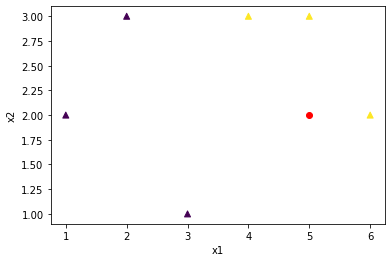

In [3]:
# draw Graph
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [15]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [5]:
# sigmoid 함수를 통한 가설 정의
# tf.exp -> e^x를 만드는 함수
# tf.matmul -> 행렬 a, b의 곱
# features -> 입력값
def logistic_regression(features):
    hypothesis = tf.divide(1., 1 + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [6]:
# hypothesis -> sigmoid 연산값
# features -> 인풋값
# labels -> Y값
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

In [7]:
# decision boundary -> 1, 0을 결정하는 과정
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [8]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        hypothesis = logistic_regression(features)
        cost = loss_fn(hypothesis, features, labels)
    return tape.gradient(cost, [W, b])

In [16]:
EPOCHS = 1000
LR = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

for i in range(EPOCHS):
    grads = grad(x_train, y_train)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    if i % 100 == 0:
        print("Iter: {}, Loss: {:.4f}".format(i, loss_fn(logistic_regression(x),x,y)))
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))
        

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Testset Accuracy: 1.0000
